# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clustermap:

In [20]:
import seaborn as sns
%matplotlib inline

In [21]:
flights = sns.load_dataset('flights')

In [22]:
tips = sns.load_dataset('tips')

In [23]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [24]:
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [25]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [26]:
# Matrix form for correlation data
tips.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

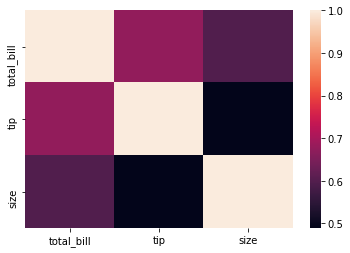

In [27]:
sns.heatmap(tips.corr())

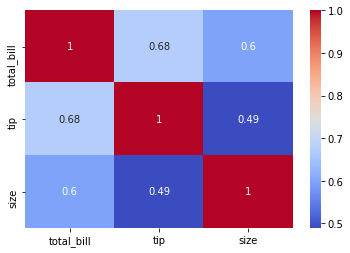

In [28]:
sns.heatmap(tips.corr(),cmap='coolwarm', annot=True)

Or for the flights data:

In [30]:
#flights.pivot_table(values='passengers',index='month',columns='year')
flights.pivot_table(values='passengers', columns ='month',index='year')

month  January  February  March  April  ...  September  October  November  December
year                                    ...                                        
1949       112       118    132    129  ...        136      119       104       118
1950       115       126    141    135  ...        158      133       114       140
1951       145       150    178    163  ...        184      162       146       166
1952       171       180    193    181  ...        209      191       172       194
1953       196       196    236    235  ...        237      211       180       201
1954       204       188    235    227  ...        259      229       203       229
1955       242       233    267    269  ...        312      274       237       278
1956       284       277    317    313  ...        355      306       271       306
1957       315       301    356    348  ...        404      347       305       336
1958       340       318    362    348  ...        404      359       310       337
1959       360       342    406    396  ...        463      407       362       405
1960       417       391    419    461  ...        508      461       390       432

[12 rows x 12 columns]

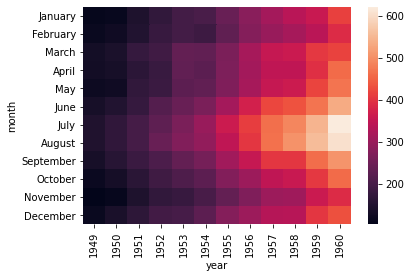

In [32]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

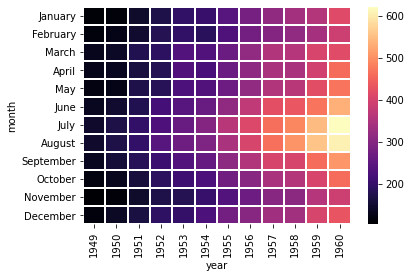

In [33]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

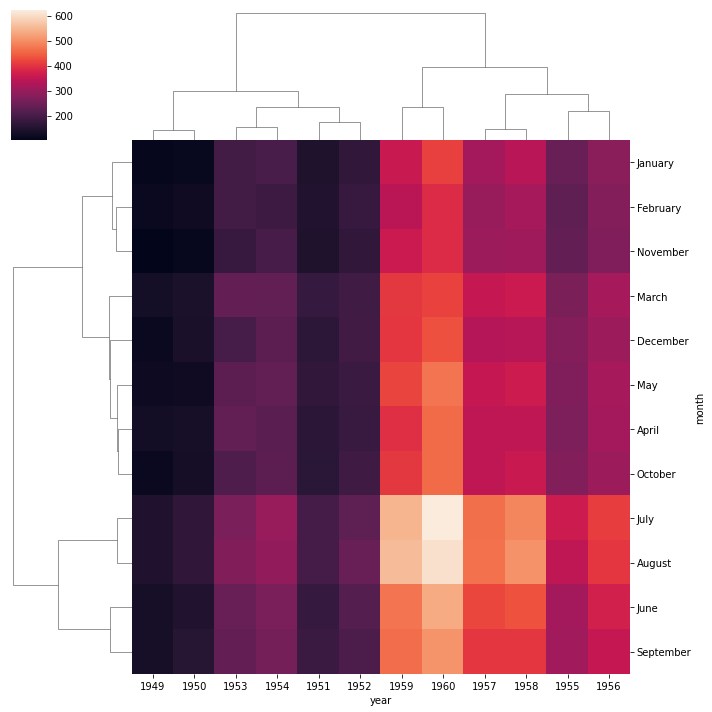

In [18]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

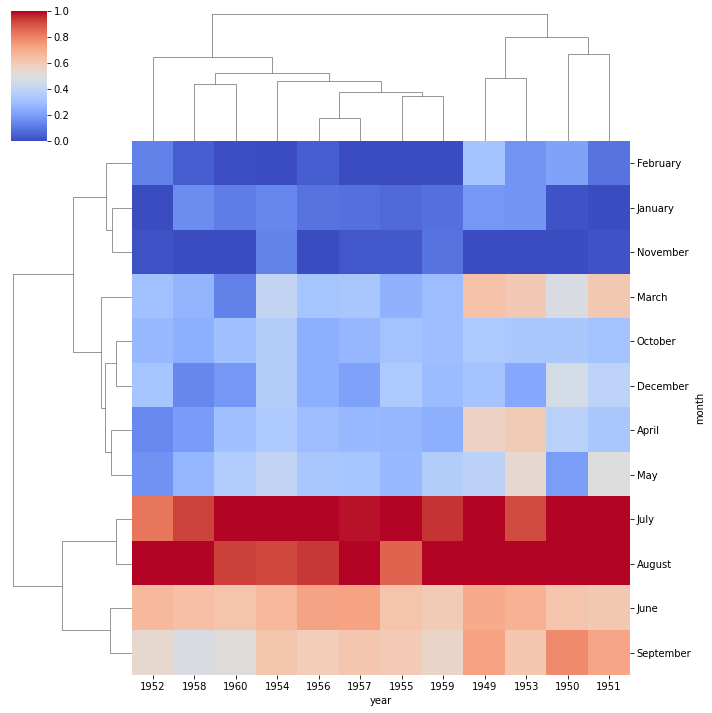

In [19]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)